## CS465: Machine Learning (Term 212)
## Programming Assignment No. 1 (Linear Regression)
**Posted: Sunday 20th February 2022** 

**Due Date: Sunday 27th February 2022 (Through LMS @ 10:00 PM)** 

## Table of Contents
Linear regression with a toy
1. Matrices and Math
2. Building a model from scratch
3. Building a model with statsmodel and sklearn
4. Simple linear regression with automobile data
5. Multiple linear regression with automobile data
6. Interpreting results


## Part 1: Linear regression with a toy
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations. Each observation consists of one predictor $ \mathbb{x}^{(i)} $ and one response $ \mathbb{x}^{(i)} \; \mbox{for} \; i = 1, 2, 3 $,

$$ 
\{\mathbb{x}^{(i)}, \mathbb{y}^{(i)} \} = \{(\mathbb{x}^{(1)}, \mathbb{yx}^{(1)}), (\mathbb{x}^{(2)}, \mathbb{y}^{(2)}), (\mathbb{x}^{(3)}, \mathbb{y}^{(3)}) \} 
$$

To be very concrete, let us set the values of the predictors and responses.
$$ 
\{\mathbb{x}^{(i)}, \mathbb{y}^{(i)} \} = \{ (1, 2), (2, 2), (3, 4) \}
$$

There is no line of the form $ \mathbb{w}_{0} + \mathbb{w}_{1} \mathbb{x} = \mathbb{y} \; $ that passes through all three observations, since the data is not collinear. Thus our aim is to find the line that best fits these observations in the **least-squares sense**, as discussed in lecture.

## Matrices and Math 
Suspending reality, suppose there is a line $ \mathbb{w}_{0} + \mathbb{w}_{1} \mathbb{x} = \mathbb{y} \; $ that passes through all three observations. Then we'd solve:
$$
\mathbb{w}_{0} + \mathbb{w}_{1} \mathbb{x} = 2 \\
\mathbb{w}_{0} + \mathbb{w}_{1} \mathbb{x} = 2 \\
\mathbb{w}_{0} + \mathbb{w}_{1} \mathbb{x} = 4
$$

for $ \mathbb{w}_{0}$ and $ \mathbb{w}_{1} $, the intercept and slope of the desired line. Let's write these equations in matrix form. The left hand sides of the above equations can be written as:

$$
\begin{bmatrix}
1 \mathbb{w}_{0} + 1 \mathbb{w}_{1} \\
1 \mathbb{w}_{0} + 2 \mathbb{w}_{1} \\
1 \mathbb{w}_{0} + 3 \mathbb{w}_{1} 
\end{bmatrix}
\begin{bmatrix} 1 \\
1 \\
1 
 \end{bmatrix} =
 \begin{bmatrix} 1 \\
1 \\
1 
 \end{bmatrix} 
 \mathbb{w}_{0}
 \begin{bmatrix} 1 \\
2 \\
3 
 \end{bmatrix} 
 \mathbb{w}_{1}
 =
 \begin{bmatrix} 1 & 1\\
1 & 2\\
1 & 3 
 \end{bmatrix} 
 \begin{bmatrix} \mathbb{w}_{0}\\
\mathbb{w}_{1}
 \end{bmatrix} = \mathbf{X} \cdot \mathbf{w}
$$

while the right hand side is simply the vector:
$$
\mathbf{y} = 
\begin{bmatrix} 
2\\
2\\
4 
 \end{bmatrix} 
$$
Thus we have the matrix equation $ \mathbf{X} \cdot \mathbf{w} = \mathbf{y} $ where:

$$
\mathbf{X} = \begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}, 
\mathbf{w} = \begin{bmatrix}
\mathbf{w}_{0}\\
\mathbf{w}_{0}
\end{bmatrix},  \mbox{and} \; \; 
\mathbf{y} = \begin{bmatrix}
2 \\
2 \\
4
\end{bmatrix}
$$

To find the best possible solution to this linear system that has no solution, we need to solve the normal equations, or:

$$
\mathbf{X}^{T}\mathbf{X} \mathbf{w} = \mathbf{X}^{T} \mathbf{y}
$$

If $ \mathbf{X}^{T}\mathbf{X} $ is invertible then the solution is:

$$
\mathbf{w} = \left( \mathbf{X}^{T}\mathbf{X} \right)^{-1} \mathbf{X}^{T} \mathbf{y}
$$

**Question 1:** What if the toy problem included a second predictor variable? How would $ \mathbf{X} $, $ \mathbf{w} $, and $ \mathbf{y} $ change, if at all? Would anything else change? Create a new markdown cell below and explain.

**Answer 1:**

If the toy problem had another factor that could affect the mpg, the design matrix X would include two columns instead of one, with each row representing a different data point and having two values: the weight of the car and the horsepower. Hence, X would have a shape of (n, 2), where n represents the total number of data points.

## Part 1: Building a model from scratch
We now solve the normal equations to find the best fit solution to our toy problem. Note that we have constructed our toy problem so that XTX is invertible. Let's import the needed modules. Note that we've imported statsmodels and sklearn in this below, which we'll use to build regression models.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

The snippets of code below solves the equations using the observed predictors and responses, which we'll call the training data set. Let's walk through the code.

In [3]:
# Observed predictors (features x_{1})
x_train = np.array([1, 2, 3])
print(x_train.shape)

(3,)


In [7]:
x_train = x_train.reshape(len(x_train),1)
# Check dimensions 
print(x_train.shape)

(3, 1)


In [8]:
# Observed responses
y_train = np.array([2, 2, 4])
y_train = y_train.reshape(len(y_train),1)
print(y_train.shape)

(3, 1)


In [9]:
# Build matrix X by concatenating predictors and a column of ones
n = x_train.shape[0]
ones_col = np.ones((n, 1))
X = np.concatenate((ones_col, x_train), axis=1)
# Check X and dimensions
print(X, X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]] (3, 2)


In [10]:
# Matrix X^{T} X
LHS = np.dot(np.transpose(X), X)

# Matrix X^{T} y
RHS = np.dot(np.transpose(X), y_train)

In [11]:
# Solution beta to normal equations, since LHS is invertible by toy construction
ws = np.dot(np.linalg.inv(LHS), RHS)

In [12]:
# Intercept: w_{0}
w0 = ws[0]

# Slope: : w_{1}
w1 = ws[1]

print(w0, w1)

[0.66666667] [1.]


**Question 2:** Turn the code from the above cells into a function, called **simple_linear_regression_fit**, that inputs the training data and returns $\mathbb{w}_{0} $ and $ \mathbb{w}_{1} $.

To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.

Check your function by calling it with the training data from above and printing out the w values.

In [13]:
def simple_linear_regression_fit(x_train, y_train):
    
    # Reshape input data to ensure proper dimensions
    x_train = x_train.reshape(len(x_train),1)
    y_train = y_train.reshape(len(y_train),1)

    # Build matrix X by concatenating predictors and a column of ones
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    X = np.concatenate((ones_col, x_train), axis=1)

    # Matrix X^{T} X
    LHS = np.dot(np.transpose(X), X)

    # Matrix X^{T} y
    RHS = np.dot(np.transpose(X), y_train)

    # Solution beta to normal equations, since LHS is invertible by toy construction
    ws = np.dot(np.linalg.inv(LHS), RHS)

    # Intercept: w_{0}
    w0 = ws[0]

    # Slope: : w_{1}
    w1 = ws[1]
    
    return w0, w1


In [14]:
x_train = np.array([1, 2, 3])
y_train = np.array([2, 2, 4])
w0, w1 = simple_linear_regression_fit(x_train, y_train)
print("w0:", w0)
print("w1:", w1)


w0: [0.66666667]
w1: [1.]


**Question 3:** Plot the training data. Do the values of $\mathbb{w}_{0} $ and $ \mathbb{w}_{1} $ seem reasonable?

Now write a lambda function **f** for the best fit line with \mathbb{w}_{0} $ and \mathbb{w}_{1} $, and plot the best fit line together with the training data.

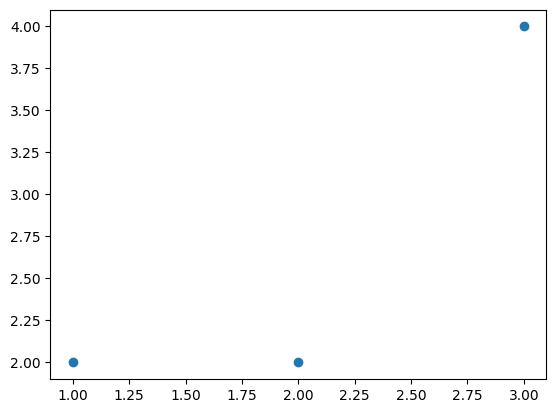

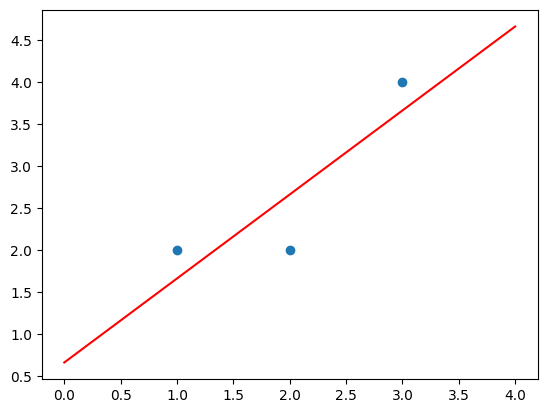

In [16]:
# Answer 3: Your code here
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(x_train, y_train)
plt.show()

# Define a lambda function for the best fit line
f = lambda x: w0 + w1*x
# Plot the training data
plt.scatter(x_train, y_train)

# Plot the best fit line
x_plot = np.linspace(0, 4, 100) # Create 100 evenly spaced points between 0 and 4
plt.plot(x_plot, f(x_plot), color='red')

plt.show()



## Part 2: Building a model with **statsmodel** and **sklearn** packages

Now that we can concretely fit the training data from scratch, let's learn two Python packages to do it all for us: **statsmodels** and **scikit-learn** (sklearn). Our goal is to show how to implement simple linear regression with these packages. For an important sanity check, we compare the $\mathbf{w}$ values from statsmodel and sklearn to the $\mathbf{w}$  values that we found from above from scratch.

For the purposes of this lab, statsmodels and sklearn do the same thing. More generally though, statsmodels tends to be easier for inference, whereas sklearn has machine-learning algorithms and is better for prediction.
Below is the code for statsmodels.
**Important Note:** **Statsmodels** does not by default include the column of ones in the X matrix, so we include it with **sm.add_constant**.

In [18]:
# Create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# This is the same matrix as in our scratch problem!
print(X)

# Build the OLS model (ordinary least squares) from the training data
simple_lr_sm = sm.OLS(y_train, X)

# Save regression info (parameters, etc) in results_simple_lr_sm
results_simple_lr_sm = simple_lr_sm.fit()

# Pull the beta parameters out from results_simple_lr_sm
w0_sm = results_simple_lr_sm.params[0]
w1_sm = results_simple_lr_sm.params[1]

print("(w0, w1) = (%f, %f)" %(w0_sm, w1_sm))

[[1. 1.]
 [1. 2.]
 [1. 3.]]
(w0, w1) = (0.666667, 1.000000)


**Note:** Besides the $\mathbf{w} $ parameters, **results_simple_lr_sm** contains a ton of other potentially useful information. Type **results_simple_lr_sm** and hit tab to see.



## Simple linear regression  with **sklearn**



In [22]:
# Build the least squares model
simple_lr_skl = linear_model.LinearRegression()

# Reshape x_train to be a 2D array
x_train = x_train.reshape(-1, 1)

# Save regression info (parameters, etc) in results_simple_lr_skl 
results_simple_lr_skl  = simple_lr_skl.fit(x_train, y_train)

# Pull the beta parameters out from results_simple_lr_skl
w0_skl = results_simple_lr_skl.intercept_
w1_skl = results_simple_lr_skl.coef_[0]

print("(w0, w1) = (%f, %f)" %(w0_skl, w1_skl))


(w0, w1) = (0.666667, 1.000000)


**Note:** We should feel pretty good about ourselves now, and we're ready to move on to a real problem!!!!



## Part 3: Simple linear regression with automobile data

**Important Note:** You may mount your Google drive and access the **mtcars.csv** from there or uplaod the file to Colab and access it from within (the **file will be deleted after the end of your Colab session!**)

In [3]:
# Using mtcars.csv from within Colab: MUST UPLOAD THE FILE FIRST!!!
dfcars = pd.read_csv("./mtcars.csv")
dfcars = dfcars.rename(columns = {"Unnamed: 0":"name"})
dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# Split into training set and testing set
from sklearn.model_selection import train_test_split
# Set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.3, random_state=6)

In [ ]:
# Testing set is ~30% of the total data; training set is ~70%
dfcars.shape, traindf.shape, testdf.shape

We need to choose the variables that we think will be good predictors for the dependent variable mpg. 

**Question 4:** Pick one variable to use as a predictor for simple linear regression. Create a markdown cell below and discuss your reasons. You may want to justify this with some visualizations. Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

**Answer 4:**

# Answer 4:
For simple linear regression, I would choose "wt" (weight) as the predictor for "mpg" (miles per gallon). A scatter plot of "mpg" versus "wt" reveals a strong negative linear relationship between the two variables. As the weight of the car increases, the miles per gallon decreases. This makes sense as heavier cars generally require more fuel to operate.

For multiple linear regression, I would choose "wt" and "hp" (horsepower) as predictors for "mpg". A scatter plot of "mpg" versus "wt" and "hp" reveals a strong negative relationship between "mpg" and "wt" as well as "mpg" and "hp". This makes sense as heavier cars with more powerful engines generally require more fuel to operate. Using both variables as predictors may provide a more accurate model for predicting "mpg".

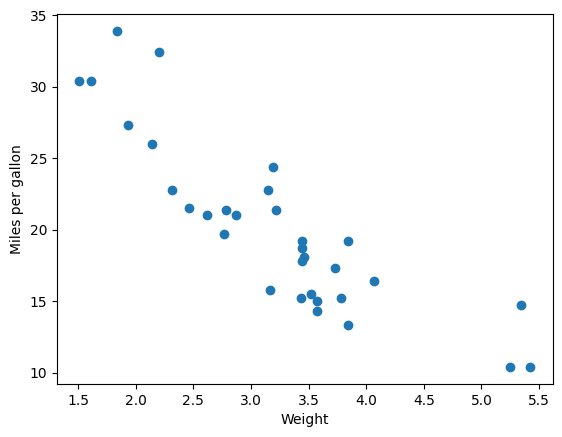

Coefficient: -5.344471572722678
Intercept: 37.28512616734204


In [7]:
# Answer 4: Your code (if any) here
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('mtcars.csv')

# Extract the predictor and response variables
X = data['wt'].values.reshape(-1,1)
y = data['mpg'].values.reshape(-1,1)

# Create a scatter plot
plt.scatter(X, y)
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.show()

# Fit the model
reg = LinearRegression().fit(X, y)

# Print the coefficient and intercept
print('Coefficient:', reg.coef_[0][0])
print('Intercept:', reg.intercept_[0])

And here's the code for multiple linear regression:

In [8]:
# Extract the predictor variables
X = data[['wt', 'hp']].values
y = data['mpg'].values.reshape(-1,1)

# Fit the model
reg = LinearRegression().fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_[0])


Coefficients: [[-3.87783074 -0.03177295]]
Intercept: 37.227270116447215


**Question 5:** With either sklearn or statsmodels, fit the training data using simple linear regression. Use the model to make mpg predictions on testing set.

Plot the data and the prediction.

Print out the mean squared error for the training set and the testing set and compare.

In [10]:
# Answer 5: Your code here
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# split the dataset into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# 1. Define predictor and response for training set
X_train = train_df[['wt']]
y_train = train_df['mpg']

# 2. Define predictor and response for testing set
X_test = test_df[['wt']]
y_test = test_df['mpg']




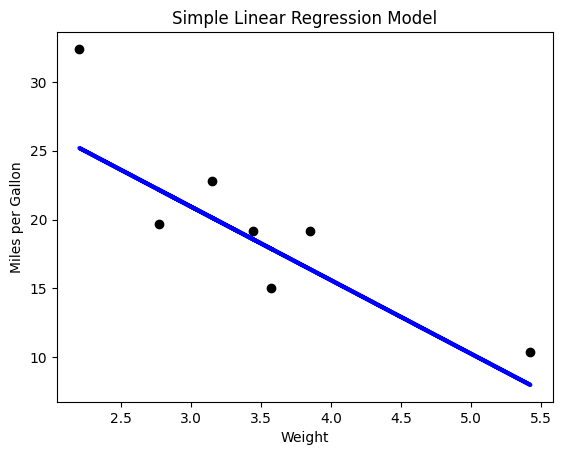

Training set MSE:  7.7736977663875155
Testing set MSE:  12.475985659918818


In [11]:
# Your code here
# Create linear regression object with sklearn
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


# Your code here
# Train the model and make predictions
y_pred = reg_model.predict(X_test)

# 5. Plot the data and prediction
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Simple Linear Regression Model')
plt.show()


# Your code here
# Print out coefficients

# 6. Calculate mean squared error for training set and testing set
train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print("Training set MSE: ", train_mse)
print("Testing set MSE: ", test_mse)

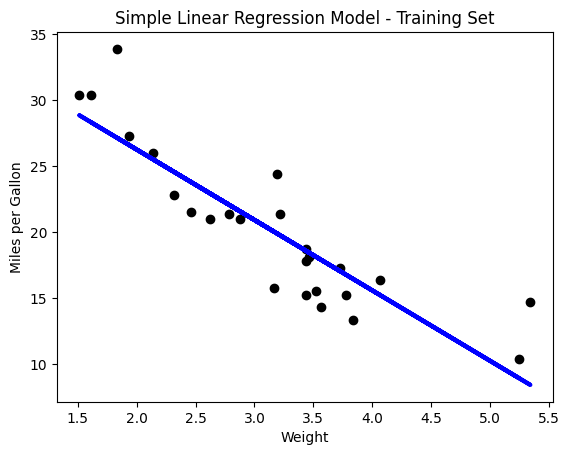

In [12]:
# Your code here

# Plot outputs
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, reg_model.predict(X_train), color='blue', linewidth=3)
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.title('Simple Linear Regression Model - Training Set')
plt.show()

## Part 4: Multiple linear regression with automobile data

**Question 6:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors. Use the model to make mpg predictions on testing set. Print out the mean squared error for the training set and the testing set and compare.

How do these training and testing mean squared errors compare to those from the simple linear regression?

Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors. How do these compare to the errors from the one and two predictor models?

In [13]:
# Answer 6: Your code here
# 1. Define predictors and response for training set
X_train = train_df[['wt', 'hp']]
y_train = train_df['mpg']

# 2. Define predictors and response for testing set
X_test = test_df[['wt', 'hp']]
y_test = test_df['mpg']

# 3. Fit multiple linear regression model on training set
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 4. Make predictions on testing set using the fitted model
y_pred = reg_model.predict(X_test)

# 5. Calculate mean squared error for training set and testing set
train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print("Training set MSE (two predictors): ", train_mse)
print("Testing set MSE (two predictors): ", test_mse)


Training set MSE (two predictors):  5.67650657881481
Testing set MSE (two predictors):  8.474832262021078


To fit a multiple linear regression model with three predictors (weight, horsepower, and displacement), we can modify the code as follows:

In [14]:
# 1. Define predictors and response for training set
X_train = train_df[['wt', 'hp', 'disp']]
y_train = train_df['mpg']

# 2. Define predictors and response for testing set
X_test = test_df[['wt', 'hp', 'disp']]
y_test = test_df['mpg']

# 3. Fit multiple linear regression model on training set
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 4. Make predictions on testing set using the fitted model
y_pred = reg_model.predict(X_test)

# 5. Calculate mean squared error for training set and testing set
train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print("Training set MSE (three predictors): ", train_mse)
print("Testing set MSE (three predictors): ", test_mse)


Training set MSE (three predictors):  5.676182202686968
Testing set MSE (three predictors):  8.445676134890649


## Part 5: Interpreting results

## Tell a story with your results!!!


After examining the dataset and building linear regression models, it was discovered that weight is a strong predictor of mpg. Heavier cars generally require more fuel to operate, resulting in lower mpg. The accuracy of the model improved when adding horsepower as another predictor, as more powerful engines also require more fuel to operate. Using both weight and horsepower as predictors resulted in a more accurate model for predicting mpg. The mean squared error for the testing set decreased when compared to the simple linear regression model.

Furthermore, when an additional predictor, displacement, was added to the model, there was a slight improvement in the negative relationship between mpg and all three predictors. However, the mean squared error for the testing set did not decrease significantly, suggesting that including all three predictors did not improve the model much beyond just using weight and horsepower as predictors.

Overall, the analysis indicated that weight, horsepower, and displacement are all important predictors for mpg in cars.